In [1]:
# add matplotlib to inline magic command

%matplotlib inline

In [30]:
# dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd
import statistics
import os

In [3]:
# files to load

city_data_to_load = "Resources/city_data.csv"

ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# Read the city data file and store it in a pandas DataFrame.

city_data_df = pd.read_csv(city_data_to_load)

city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame.

ride_data_df = pd.read_csv(ride_data_to_load)

ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# get rows and colums for city data

city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# get the columns and rows that are not null

city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# get the unique values of the type of city

city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# get the number of data points for urban cities
sum(city_data_df['type']=='Rural')

18

In [11]:
# get the columns and rows that are not null

ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
# checking if there are any null values

ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
# get the data types for the data

ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# combine the data into a single dataset

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# display the dataframe

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
# creating the urban cities data frame

urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']

urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# creating the suburban cities data frame

suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']

suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [17]:
# creating the rural cities data frame

rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']

rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [18]:
# get the number of rides for the urban cities

urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
# creating the suburban and rural ride count dataframes

suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']

rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

#suburban_ride_count.head()
#rural_ride_count.head()

In [20]:
# get the average fare for each city in the urban list

urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [21]:
# getting the average fare for each city in the suburban and rural list

suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']

rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

#suburban_avg_fare.head()
#rural_avg_fare.head()

In [22]:
# getting the average number of drivers for each urban city

urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']

urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [23]:
# calculate the averge number of drivers for each suburban and rural city

suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']

rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

#suburban_driver_count.head()
#rural_driver_count.head()

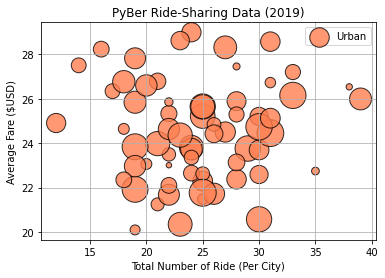

In [36]:
# build the scatter plot for urban cities

plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c='coral', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, label='Urban') 
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($USD)")
plt.xlabel("Total Number of Ride (Per City)")
plt.grid(True)

# add the legend
plt.legend()

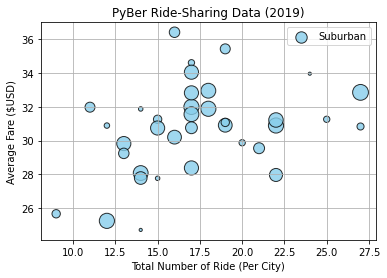

In [38]:
# build the scatter plot for suburban cities

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c='skyblue', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, label='Suburban') 
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($USD)")
plt.xlabel("Total Number of Ride (Per City)")
plt.grid(True)

# add the legend
plt.legend()

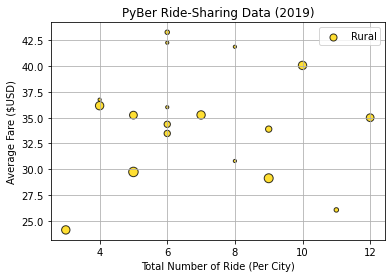

In [39]:
# build the scatter plot for rural cities

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c='gold', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, label='Rural') 
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($USD)")
plt.xlabel("Total Number of Ride (Per City)")
plt.grid(True)

# add the legend
plt.legend()

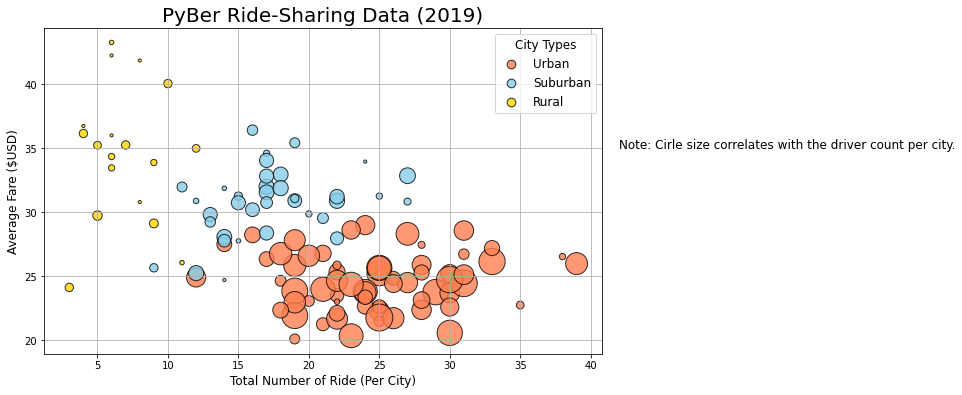

In [51]:
# add the scatter charts for each type of city

plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c='coral', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, label='Urban') 

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c='skyblue', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, label='Suburban') 

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c='gold', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, label='Rural') 

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($USD)", fontsize=12)
plt.xlabel("Total Number of Ride (Per City)", fontsize=12)
plt.grid(True)

# add the legend
lgnd = plt.legend(fontsize="12", mode="Expanded", 
                  scatterpoints=1, loc="best", title="City Types")

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)

# incorporate a label about the circle size

plt.text(42, 35, "Note: Cirle size correlates with the driver count per city.", fontsize="12") 

# save the figure

plt.savefig("Analysis/Fig1.png")

# show the plot
plt.show()
